In [72]:
import os
from numpy.random import choice
import numpy as np
import pandas as pd
import json
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [53]:
!pwd


/Users/cotearaya/Documents/Inteligencia Artificial/Preparacion prueba 2


In [54]:
datapath = 'data_de _repasoJson'
print(os.listdir(datapath))
nomarchivos = os.listdir(datapath)
nomarchivo = choice(nomarchivos)
ruta_archivo = os.path.join(datapath , nomarchivo)

['379.json', '396.json', '115.json', '545.json', '400.json', '284.json', '512.json', '142.json', '457.json', '292.json', '338.json', '154.json', '504.json', '441.json', '380.json', '553.json', '103.json', '416.json', '251.json', '314.json', '197.json', '528.json', '482.json', '178.json', '20.json', '206.json', '343.json', '98.json', '77.json', '210.json', '355.json', '139.json', '61.json', '247.json', '302.json', '181.json', '36.json', '494.json', '549.json', '119.json', '41.json', '375.json', '230.json', '16.json', '288.json', '322.json', '267.json', '508.json', '158.json', '334.json', '271.json', '57.json', '363.json', '226.json', '461.json', '174.json', '524.json', '318.json', '94.json', '436.json', '123.json', '420.json', '82.json', '6.json', '135.json', '565.json', '359.json', '477.json', '532.json', '498.json', '162.json', '476.json', '533.json', '499.json', '163.json', '358.json', '421.json', '7.json', '83.json', '134.json', '564.json', '95.json', '437.json', '122.json', '319.js

In [55]:
with open(ruta_archivo, 'r') as f:
    lines = f.read()
    print(lines)
    f.close()

{
    "mean radius": 12.21,
    "mean texture": 14.09,
    "mean perimeter": 78.78,
    "mean area": 462.0,
    "mean smoothness": 0.08108,
    "mean compactness": 0.07823,
    "mean concavity": 0.06839,
    "mean concave points": 0.02534,
    "mean symmetry": 0.1646,
    "mean fractal dimension": 0.06154,
    "radius error": 0.2666,
    "texture error": 0.8309,
    "perimeter error": 2.097,
    "area error": 19.96,
    "smoothness error": 0.004405,
    "compactness error": 0.03026,
    "concavity error": 0.04344,
    "concave points error": 0.01087,
    "symmetry error": 0.01921,
    "fractal dimension error": 0.004622,
    "worst radius": 13.13,
    "worst texture": 19.29,
    "worst perimeter": 87.65,
    "worst area": 529.9,
    "worst smoothness": 0.1026,
    "worst compactness": 0.2431,
    "worst concavity": 0.3076,
    "worst concave points": 0.0914,
    "worst symmetry": 0.2677,
    "worst fractal dimension": 0.08824
}


In [56]:
with open(ruta_archivo, 'r') as f:
    data = json.load(f)
    #En caso que una linea este dañada o mal escrita , se sobrescribe con un replace
    print(data)
    f.close()

{'mean radius': 12.21, 'mean texture': 14.09, 'mean perimeter': 78.78, 'mean area': 462.0, 'mean smoothness': 0.08108, 'mean compactness': 0.07823, 'mean concavity': 0.06839, 'mean concave points': 0.02534, 'mean symmetry': 0.1646, 'mean fractal dimension': 0.06154, 'radius error': 0.2666, 'texture error': 0.8309, 'perimeter error': 2.097, 'area error': 19.96, 'smoothness error': 0.004405, 'compactness error': 0.03026, 'concavity error': 0.04344, 'concave points error': 0.01087, 'symmetry error': 0.01921, 'fractal dimension error': 0.004622, 'worst radius': 13.13, 'worst texture': 19.29, 'worst perimeter': 87.65, 'worst area': 529.9, 'worst smoothness': 0.1026, 'worst compactness': 0.2431, 'worst concavity': 0.3076, 'worst concave points': 0.0914, 'worst symmetry': 0.2677, 'worst fractal dimension': 0.08824}


In [57]:
!curl -O https://datahub.io/machine-learning/breast-cancer/r/breast-cancer.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19021  100 19021    0     0  11324      0  0:00:01  0:00:01 --:--:-- 11396


In [58]:
dataset = pd.read_csv('breast-cancer.csv')

dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


los datos actuales no pueden ser accedidos para utilizarlos ya que e; '-' esta molestando a la lectura , lo que se debe hacer es crear una funcion para separarlo y reemplazarlo


In [60]:
def repararcol(x: str) -> float:
    numero = x.split('-')
    #crear una lista nueva de los datos nuevos que reempl a los antiguos
    nuevos_num = []
    #recorrer los numeros que en el str que se quiere reemplazar
    for n in numero:
        nuevos_num.append(float(n))
    return np.mean(nuevos_num)

In [61]:
dataset['age'].apply(repararcol)

0      44.5
1      54.5
2      54.5
3      44.5
4      44.5
       ... 
281    54.5
282    54.5
283    34.5
284    54.5
285    54.5
Name: age, Length: 286, dtype: float64

In [62]:
dataset['age'] = dataset['age'].apply(repararcol)
dataset['tumor-size'] = dataset['tumor-size'].apply(repararcol)
dataset['inv-nodes'] = dataset['inv-nodes'].apply(repararcol)

dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,44.5,premeno,17.0,1.0,yes,3,right,left_up,no,recurrence-events
1,54.5,ge40,17.0,1.0,no,1,right,central,no,no-recurrence-events
2,54.5,ge40,37.0,1.0,no,2,left,left_low,no,recurrence-events
3,44.5,premeno,37.0,1.0,yes,3,right,left_low,yes,no-recurrence-events
4,44.5,premeno,32.0,4.0,yes,2,left,right_up,no,recurrence-events


In [70]:
df = dataset[['age','tumor-size','inv-nodes','deg-malig']]
df.head()


,age,tumor-size,inv-nodes,deg-malig
0,44.5,17.0,1.0,3
1,54.5,17.0,1.0,1
2,54.5,37.0,1.0,2
3,44.5,37.0,1.0,3
4,44.5,32.0,4.0,2


In [71]:
pipe = make_pipeline(PCA(n_components=2),StandardScaler())
transf_data = pipe.fit_transform(df)

In [73]:
clf= KMeans(n_clusters=2)

clf.fit(transf_data)

pred = clf.predict(transf_data)

In [74]:
pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int32)

In [75]:
transf_data

array([[ 0.80693243, -0.77603112, -0.30365038,  1.65665361],
       [ 0.93585538,  0.20667311, -0.30347358, -1.19401903],
       [-0.94344803,  0.47015678, -0.63408786, -0.07454898],
       ...,
       [-0.75968607, -1.56251651,  1.13305281, -0.73125916],
       [ 0.93430336,  0.20626913, -0.28418021,  0.27063354],
       [-1.4144379 ,  0.53572471, -0.70227141,  1.30380797]])

In [79]:
df[df.columns[-2]].unique()

array([3, 1, 2])

In [77]:
def str2clas(x):
    if 'recurrence-events' == x:
        return 0
    return 1
df['clases_numericas'] = df[df.columns[-1]].apply(str2clas)

df.head()

/var/folders/ys/jxxv1yt57zlfqd9gmyxrs_nh0000gn/T/ipykernel_19894/3023718964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clases_numericas'] = df[df.columns[-1]].apply(str2clas)


,age,tumor-size,inv-nodes,deg-malig,clases_numericas
0,44.5,17.0,1.0,3,1
1,54.5,17.0,1.0,1,1
2,54.5,37.0,1.0,2,1
3,44.5,37.0,1.0,3,1
4,44.5,32.0,4.0,2,1


In [87]:
import matplotlib.pyplot as plt


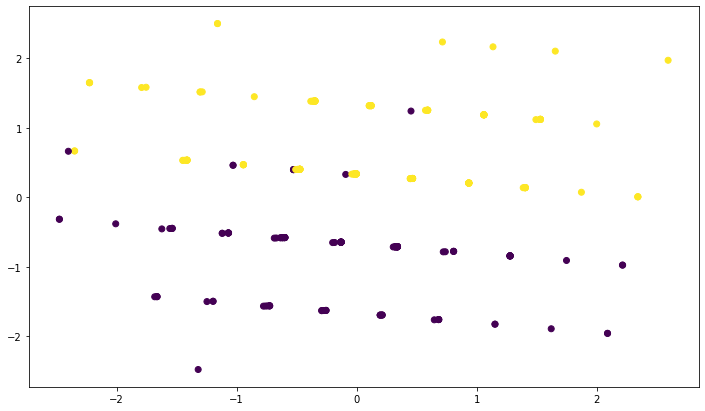

In [89]:
fig = plt.figure(figsize = (12,7))

ax = fig.add_subplot()

ax.scatter(x = transf_data[:, 0] , y=transf_data[: , 1], c=pred)

plt.show()